In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

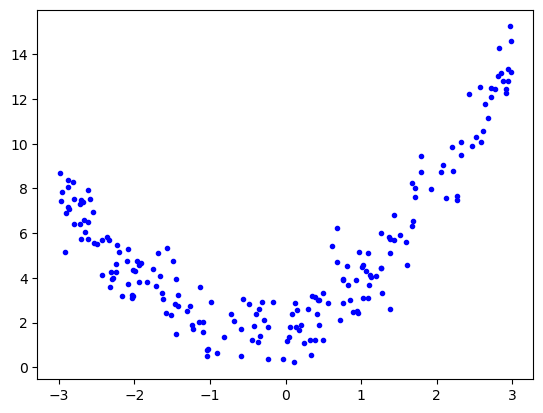

In [3]:
x=6* np.random.rand(200,1)-3
y=x**2 + x +2 + np.random.randn(200,1)
plt.plot(x,y,'b.')

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [6]:
y_pred = lr.predict(x_test)

In [7]:
r2_score(y_test,y_pred)

0.26013760376524664

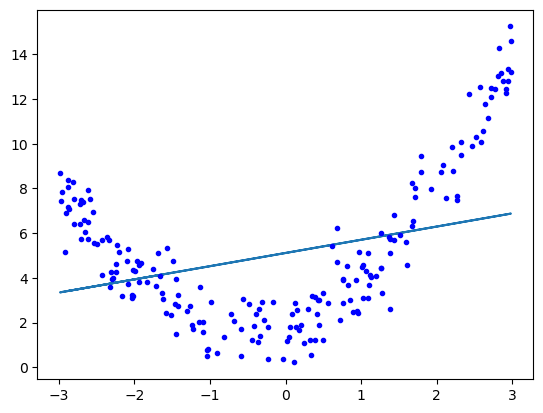

In [8]:
plt.plot(x_train,lr.predict(x_train))
plt.plot(x,y,'b.')

In [9]:
poly=PolynomialFeatures(degree=2,include_bias=True)

In [10]:
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.fit_transform(x_test)

In [11]:
print(x_train.shape,x_train_trans.shape)

(160, 1) (160, 3)


In [12]:
model=LinearRegression()
model.fit(x_train_trans,y_train)

LinearRegression()

In [13]:
y_pred=model.predict(x_test_trans)
y_pred

array([[ 2.16123125],
       [ 7.80824764],
       [ 1.72943138],
       [ 5.19457045],
       [ 2.53663942],
       [ 3.95948522],
       [ 6.36533301],
       [ 5.05613475],
       [ 2.39468835],
       [12.12954459],
       [13.71392663],
       [ 6.41145182],
       [ 4.19778387],
       [ 2.16898877],
       [11.65938257],
       [ 6.98225911],
       [ 6.61512   ],
       [ 1.99891863],
       [ 3.6170046 ],
       [ 2.47565246],
       [ 2.61709165],
       [ 4.04319892],
       [ 4.91789335],
       [ 5.22287305],
       [ 2.38781528],
       [ 1.79765303],
       [ 1.71121487],
       [13.18988009],
       [ 6.6877839 ],
       [ 3.81669065],
       [12.79295841],
       [ 6.61140573],
       [13.67081694],
       [ 4.76828141],
       [ 1.9731194 ],
       [13.03988769],
       [10.56555583],
       [ 1.71764061],
       [12.18734484],
       [11.86026364]])

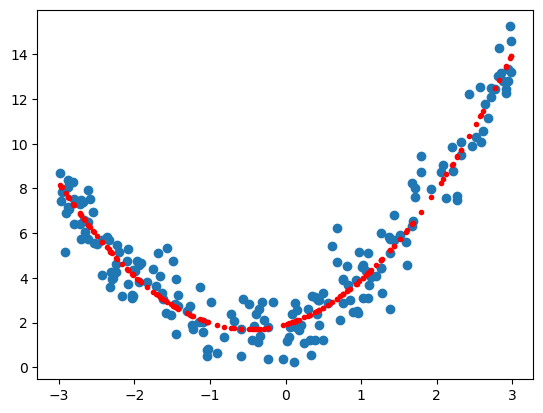

In [14]:
plt.scatter(x,y)
plt.plot(x_train, model.predict(x_train_trans),'r.')

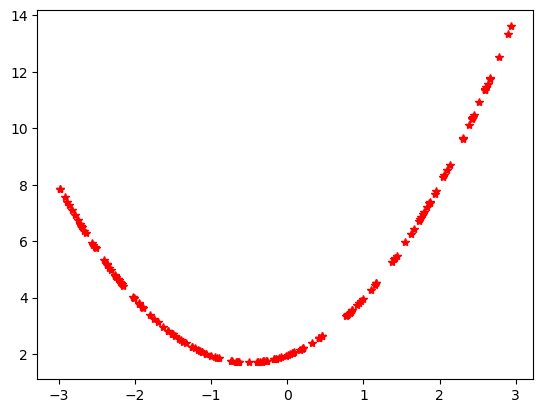

In [15]:
# Ridge regression

In [16]:
from sklearn.linear_model import Ridge

In [17]:
poly=PolynomialFeatures(degree=10,include_bias= True)

In [18]:
x_train_trans=poly.fit_transform(x_train)

In [19]:
x_test_trans = poly.fit_transform(x_test)

In [20]:
rr = Ridge(alpha=1)

In [21]:
rr.fit(x_train_trans,y_train)

Ridge(alpha=1)

In [22]:
# Predict using the model
y_train_pred =rr.predict(x_train_trans)
y_test_pred = rr.predict(x_test_trans)

# Calculate R-squared values
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print R-squared values
print(f"Training R-squared: {r2_train:.2f}")
print(f"Testing R-squared: {r2_test:.2f}")


Training R-squared: 0.91
Testing R-squared: 0.93


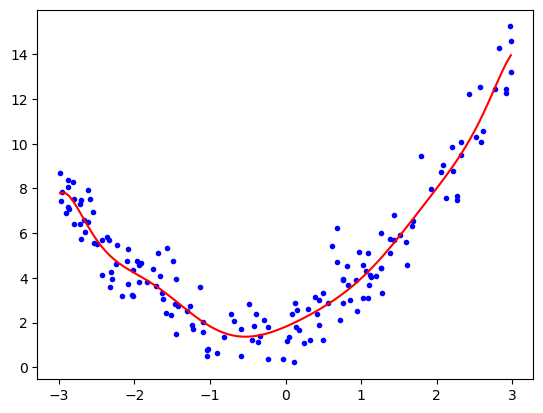

In [23]:
plt.plot(x_train,y_train,'b.')

# generate a smooth curve
x_line=np.linspace(x_train.min(),x_train.max(),100).reshape(-1,1)

x_line_poly=poly.transform(x_line)

plt.plot(x_line,rr.predict(x_line_poly),color='r')

In [24]:
# Lasso

In [25]:
from sklearn.linear_model import Lasso

In [26]:
la = Lasso(alpha=1)

In [27]:
la.fit(x_train_trans,y_train)

C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.561e+01, tolerance: 1.598e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [30]:
# Predict using the model
y_train_pred =la.predict(x_train_trans)
y_test_pred = la.predict(x_test_trans)

# Calculate R-squared values
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print R-squared values
print(f"Training R-squared: {r2_train:.2f}")
print(f"Testing R-squared: {r2_test:.2f}")


Training R-squared: 0.83
Testing R-squared: 0.87


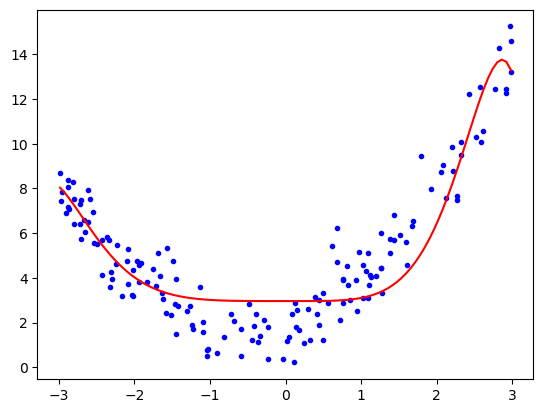

In [31]:
plt.plot(x_train,y_train,'b.')

# generate a smooth curve
x_line=np.linspace(x_train.min(),x_train.max(),100).reshape(-1,1)

x_line_poly=poly.transform(x_line)

plt.plot(x_line,la.predict(x_line_poly),color='r')

In [32]:
# Elastic

In [33]:
from sklearn.linear_model import ElasticNet

In [34]:
el = ElasticNet(alpha=1)

In [35]:
el.fit(x_train_trans,y_train)

C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.866e+01, tolerance: 1.598e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1)

In [36]:
# Predict using the model
y_train_pred = el.predict(x_train_trans)
y_test_pred = el.predict(x_test_trans)

# Calculate R-squared values
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print R-squared values
print(f"Training R-squared: {r2_train:.2f}")
print(f"Testing R-squared: {r2_test:.2f}")


Training R-squared: 0.85
Testing R-squared: 0.90


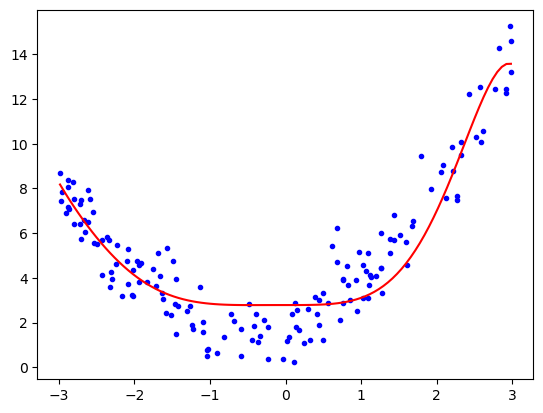

In [37]:
plt.plot(x_train,y_train,'b.')

# generate a smooth curve
x_line=np.linspace(x_train.min(),x_train.max(),100).reshape(-1,1)

x_line_poly=poly.transform(x_line)

plt.plot(x_line,el.predict(x_line_poly),color='r')